In [144]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [145]:
nfl_stats = "nfl resources/NFL_Stats.csv"
nfl_stats_df = pd.read_csv(nfl_stats)
nfl_stats_df.head()

,Rk,Player,From,To,Draft,Tm,Lg,Ht,Wt,BMI,...,Rate,Y/A,Y/G,W,L,T,Yrs,PB,AP1,AV
0,1,Peyton Manning,1998,2015,1.0,TOT,NFL,77,230,27.3,...,96.5,7.67,270.5,186.0,79.0,0.0,17,14,7,271
1,2,Tom Brady,2000,2018,6.0,NWE,NFL,80,225,27.4,...,97.6,7.51,261.5,196.0,55.0,0.0,19,13,3,255
2,3,Drew Brees,2001,2018,2.0,TOT,NFL,72,209,28.3,...,96.7,7.58,282.9,142.0,106.0,0.0,18,11,1,239
3,4,Brett Favre*,1991,2010,2.0,TOT,NFL,74,225,28.9,...,86.0,7.06,237.9,186.0,112.0,0.0,20,11,3,255
4,5,John Elway*,1983,1998,1.0,DEN,NFL,75,215,26.9,...,79.9,7.10,220.0,148.0,82.0,1.0,16,9,0,203


In [146]:
# Clean Dataframe by renaming and deleting unnecssary columns

nfl_stats_df = nfl_stats_df.rename(columns={"Tm":"Team",
                                           "PB":"Pro Bowls",
                                           "Ht": "Height (in)"})
del nfl_stats_df["Wt"]
del nfl_stats_df["BMI"]
del nfl_stats_df["AV"]
del nfl_stats_df["AP1"]
del nfl_stats_df["Rk"]
del nfl_stats_df["Lg"]
del nfl_stats_df["Team"]


nfl_stats_df.head()


,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,TD,Int,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls
0,Peyton Manning,1998,2015,1.0,77,266,265,6125,9380,65.30,...,539,251,96.5,7.67,270.5,186.0,79.0,0.0,17,14
1,Tom Brady,2000,2018,6.0,80,253,251,5629,8805,63.93,...,488,160,97.6,7.51,261.5,196.0,55.0,0.0,19,13
2,Drew Brees,2001,2018,2.0,72,249,248,6222,9294,66.95,...,488,228,96.7,7.58,282.9,142.0,106.0,0.0,18,11
3,Brett Favre*,1991,2010,2.0,74,302,298,6300,10169,61.95,...,508,336,86.0,7.06,237.9,186.0,112.0,0.0,20,11
4,John Elway*,1983,1998,1.0,75,234,231,4123,7250,56.87,...,300,226,79.9,7.10,220.0,148.0,82.0,1.0,16,9


In [147]:
nfl_stats_df.columns

Index(['Player', 'From', 'To', 'Draft', 'Height (in)', 'G', 'GS', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'Int', 'Rate', 'Y/A', 'Y/G', 'W', 'L', 'T', 'Yrs',
       'Pro Bowls'],
      dtype='object')

In [148]:
#Get Winning Percentage
nfl_stats_df ["W"].fillna(0, inplace=True)
nfl_stats_df ["L"].fillna(0, inplace=True)
nfl_stats_df ["T"].fillna(0, inplace=True)

nfl_stats_df["Win Record"] = nfl_stats_df["W"]/(nfl_stats_df["W"] + nfl_stats_df["L"] + nfl_stats_df["T"])

In [157]:
# Fill undrafted with a 0
nfl_stats_df["Draft"].fillna(0, inplace=True)
nfl_stats_df["Draft"] = nfl_stats_df["Draft"].astype(str)

In [158]:
#Dataframe of each Draft Round

undrafted = nfl_stats_df.loc[nfl_stats_df["Draft"] == "0.0"]
one = nfl_stats_df.loc[nfl_stats_df["Draft"] == "1.0"]
two = nfl_stats_df.loc[nfl_stats_df["Draft"] == "2.0"]
three = nfl_stats_df.loc[nfl_stats_df["Draft"] == "3.0"]
four = nfl_stats_df.loc[nfl_stats_df["Draft"] == "4.0"]
five = nfl_stats_df.loc[nfl_stats_df["Draft"] == "5.0"]
six = nfl_stats_df.loc[nfl_stats_df["Draft"] == "6.0"]
seven = nfl_stats_df.loc[nfl_stats_df["Draft"] == "7.0"]
eight = nfl_stats_df.loc[nfl_stats_df["Draft"] == "8.0"]
nine = nfl_stats_df.loc[nfl_stats_df["Draft"] == "9.0"]
ten = nfl_stats_df.loc[nfl_stats_df["Draft"] == "10.0"]
eleven = nfl_stats_df.loc[nfl_stats_df["Draft"] == "11.0"]
twelve = nfl_stats_df.loc[nfl_stats_df["Draft"] == "12.0"]
thirtheen = nfl_stats_df.loc[nfl_stats_df["Draft"] == "13.0"]
fourtheen = nfl_stats_df.loc[nfl_stats_df["Draft"] == "14.0"]

#Build Dataframe organized by Round and Average Passer Rating

ratings_by_draft = pd.DataFrame({"Undrafted":[undrafted["Rate"].mean()],
                                 "1st Round" : [one["Rate"].mean()],
                                 "2nd Round" : [two["Rate"].mean()],
                                 "3rd Round" : [three["Rate"].mean()],
                                 "4th Round" : [four["Rate"].mean()],
                                 "5th Round" : [five["Rate"].mean()],
                                 "6th Round" : [six["Rate"].mean()],
                                 "7th Round" : [seven["Rate"].mean()],
                                 "8th Round" : [eight["Rate"].mean()],
                                 "9th Round" : [nine["Rate"].mean()],
                                 "10th Round" : [ten["Rate"].mean()],
                                 "11th Round" : [eleven["Rate"].mean()],
                                 "12th Round" : [twelve["Rate"].mean()],
                                 "13th Round" : [thirtheen["Rate"].mean()],
                                 "14th Round" : [fourtheen["Rate"].mean()]})

ratings_by_draft = ratings_by_draft.T
ratings_by_draft.reset_index(level=0, inplace = True)
ratings_by_draft = ratings_by_draft.rename(columns={"index": "Draft Round",
                                                   "0": "Passer Rating"})

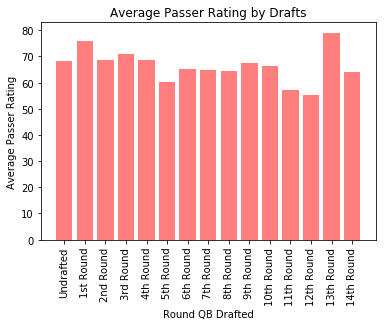

<Figure size 432x288 with 0 Axes>

In [159]:
# set x axis and tick location
x_axis = np.arange(len(ratings_by_draft))
tick_locations = [value for value in x_axis]

# Createa bar chart comparing draft position and passer rating
plt.bar(x_axis, ratings_by_draft[0], color = 'r', alpha = 0.5, align = "center")
plt.xticks(tick_locations, ratings_by_draft["Draft Round"], rotation = "vertical")

plt.title("Average Passer Rating by Drafts")
plt.xlabel("Round QB Drafted")
plt.ylabel("Average Passer Rating")
plt.show()
plt.savefig("Images/Average Passer Rating by Draft Rounds")

In [162]:
nfl_stats_df["Draft"] = nfl_stats_df["Draft"].astype(float)
nfl_stats_df["Height (in)"].unique()

array([77, 80, 72, 74, 75, 76, 73, 71, 78, 70, 79, 69], dtype=int64)

In [170]:
# Quarter by Height Bins
height_bins = [0, 70, 74, 78, 82]
group_names = ["under 70 Inches", "70-74 Inches", "74-78 Inches", "Over 78 Inches"]

nfl_stats_df["Height Range"] = pd.cut(nfl_stats_df["Height (in)"], height_bins, labels = group_names)

average_win_loss_record = nfl_stats_df.groupby("Height Range")["Win Record"].mean()
average_pro_bowl_appearance = nfl_stats_df.groupby("Height Range")["Pro Bowls"].mean()
average_rating = nfl_stats_df.groupby("Height Range")["Rate"].mean()
average_draft_spot = nfl_stats_df.groupby("Height Range")["Draft"].mean()

qb_by_height = pd.DataFrame({"Avg Game Record": average_win_loss_record,
                            "Avg Pro Bowl Appearances":average_pro_bowl_appearance,
                            "Average Passer Rating": average_rating,
                            "Average Draft Spot":average_draft_spot})

qb_by_height= qb_by_height.reset_index()
qb_by_height

,Height Range,Avg Game Record,Avg Pro Bowl Appearances,Average Passer Rating,Average Draft Spot
0,under 70 Inches,0.575758,0.333333,54.600000,5.333333
1,70-74 Inches,0.373632,0.441315,67.937559,3.065728
2,74-78 Inches,0.380949,0.529605,69.244079,3.115132
3,Over 78 Inches,0.487719,3.250000,75.775000,2.500000


In [ ]:
# Build Pie Chart
Height_Range = group_names
